In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
data = pd.read_csv('/content/drive/My Drive/data/viettri_quality.csv', index_col='date')

In [74]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,44,17,29,2,9,4
3/2/2019,65,37,27,4,12,4
3/3/2019,81,38,2,1,1,2
3/4/2019,51,24,21,4,8,1
3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...
5/28/2024,38,24,35,1,15,5
5/29/2024,38,17,41,7,15,10
5/30/2024,28,8,11,1,15,1


In [75]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [76]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [78]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               1408      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/50
112/112 [==============================] - 2s 4ms/step - loss: 0.0244 - val_loss: 0.0174
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0169
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0202
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.0200
Epoch 5/50
112/112 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0173
Epoch 6/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0184
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0187
Epoch 8/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.0176
Epoch 9/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0177
Epoch 10/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.0193

In [80]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.20903955 0.20903955 0.15254237 0.06214689 0.11299435]
Predict value:
18/18 [==============================] - 0s 2ms/step
[[ 3.38583201e-01]
 [ 8.74072313e-04]
 [ 2.62041599e-01]
 [ 1.70100451e-01]
 [ 2.11849153e-01]
 [ 1.81409508e-01]
 [ 3.95061225e-01]
 [ 1.66510314e-01]
 [ 1.28979713e-01]
 [ 4.04091835e-01]
 [ 3.33548486e-01]
 [ 3.09203804e-01]
 [ 2.00615883e-01]
 [ 2.38702565e-01]
 [ 1.56632945e-01]
 [ 2.14095443e-01]
 [ 1.08935334e-01]
 [ 3.01422983e-01]
 [ 3.82221669e-01]
 [ 1.61013693e-01]
 [ 2.66530007e-01]
 [ 1.89100862e-01]
 [ 1.37173116e-01]
 [ 5.34430981e-01]
 [ 9.62754115e-02]
 [ 1.80997342e-01]
 [ 1.95436001e-01]
 [-2.59921312e-01]
 [ 3.96266311e-01]
 [ 6.82752967e-01]
 [ 1.20991401e-01]
 [ 2.36525297e-01]
 [ 4.22064155e-01]
 [ 2.17014849e-01]
 [ 1.67257875e-01]
 [ 1.93692595e-01]
 [ 2.71139801e-01]
 [ 3.22198957e-01]
 [ 2.67928511e-01]
 [ 1.95473164e-01]
 [ 4.26669270e-01]
 [ 2.88894504e-01]
 [ 1.22000262e-01]
 [ 3.84711593e-01]
 [ 2.58139879e-01]
 [ 3.1

In [81]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 3ms/step


0.24008782914046334

In [82]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.10830494259340087
MAPE: 23321758613521.887
MAE: 0.07532922076310129


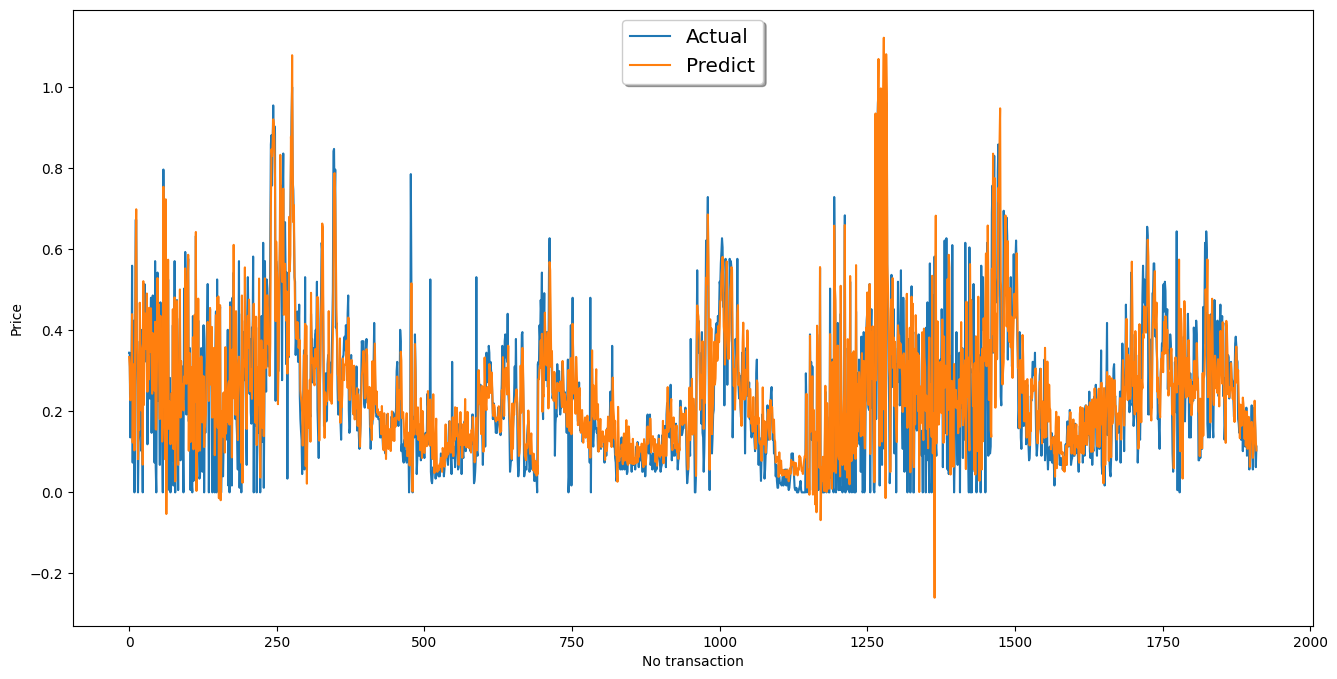

In [84]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [85]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 22ms/step
Next 90 days PM2.5 predictions: [19.319279 31.38092  42.554417 36.86269  29.627748 27.191269 29.09425
 29.26772  27.276505 30.170969 30.65338  32.445755 31.656866 28.047749
 26.574097 27.02497  29.079084 29.727251 30.150417 29.099905 27.886816
 27.817749 26.836313 26.8896   27.47236  28.361822 28.783018 28.232561
 27.349165 26.321327 26.339243 26.581314 27.09338  27.600086 27.627724
 27.337797 26.493359 25.86169  25.64748  26.070139 26.71894  27.092352
 27.040003 26.52907  25.944475 25.447002 25.413353 25.810318 26.343298
 26.705992 26.583567 26.14563  25.537468 25.180328 25.261854 25.674438
 26.176863 26.404997 26.26122  25.833288 25.318876 25.017805 25.124926
 25.560658 26.028456 26.229233 26.04236  25.60629  25.145947 24.891102
 25.0243   25.43317  25.893284 26.085396 25.901737 25.462046 25.010206
 24.791645 24.932129 25.32932  25.777391 25.970407 25.801012 25.368567
 24.907986 24.691046 24.832163 25.225388 25.682182 25.88699 ]


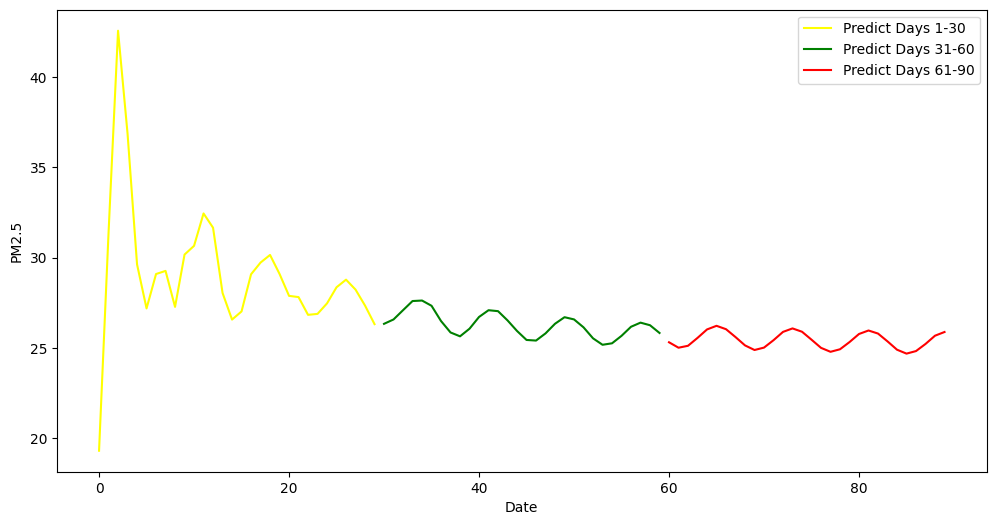

In [86]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()